In [ ]:
!pip install pulser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.18 requires requests>=2.26, but you have requests 2.25.1 which is incompatible.
tweepy 4.1

In [ ]:
from pulser import Pulse, Register, Sequence
import numpy as np

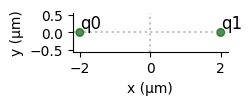

In [ ]:
qubits = {'q0':(-2,0), 'q1':(2,0)}
reg = Register(qubits)
reg.draw()

In [ ]:
from pulser.devices import MockDevice # a basic emulator (no physical constraints on parameters definition)
seq = Sequence(reg, MockDevice)
seq.declare_channel('raman', 'raman_local', initial_target='q0')

In [ ]:
first_pulse = Pulse.ConstantPulse(100, 10, -5, 0)
second_pulse = Pulse.ConstantPulse(150, 20, 10, 0)

In [ ]:
seq.add(first_pulse, 'raman')
seq.target('q1','raman')
seq.add(second_pulse, 'raman')

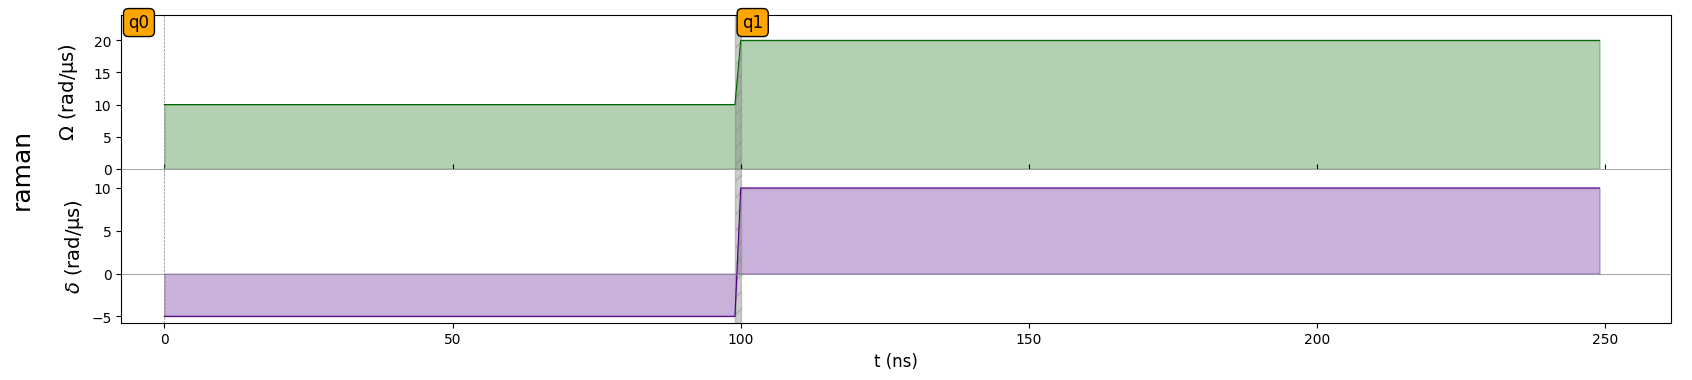

In [ ]:
seq.draw()

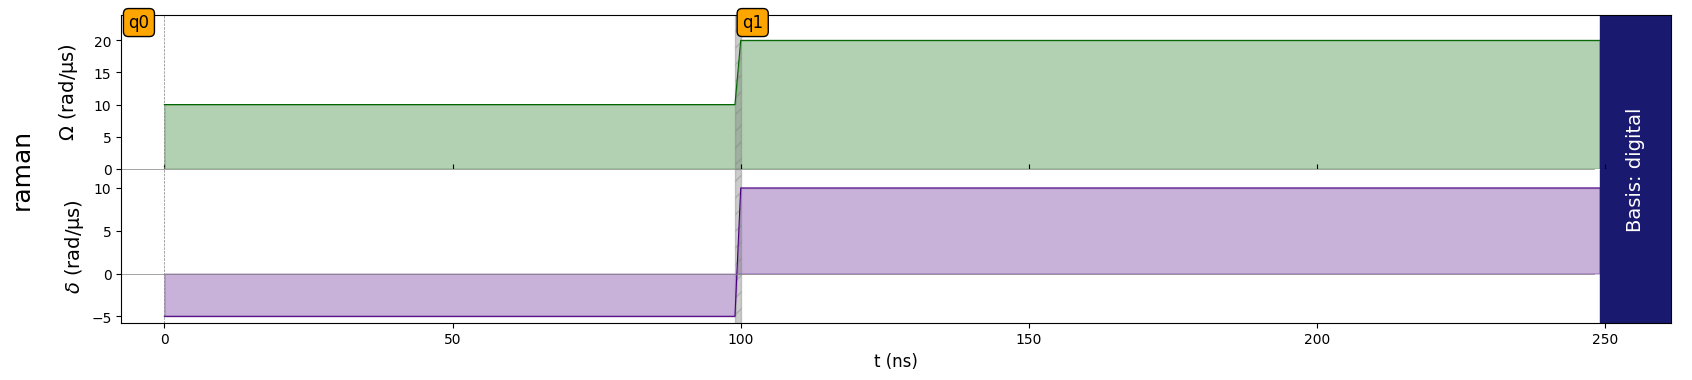

In [ ]:
seq.measure(basis='digital')
seq.draw()

In [ ]:
from pulser_simulation import Simulation

In [ ]:
sim = Simulation(seq, sampling_rate=0.1)
res = sim.run()

In [ ]:
print(res.states)

[Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]], Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 9.97501283e-01-4.99378087e-02j]
 [ 9.60091080e-09+1.93146587e-07j]
 [-1.24922628e-03-4.99584414e-02j]
 [ 9.60429674e-09-2.38261897e-10j]], Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 9.90020896e-01-9.95000717e-02j]
 [-3.70853717e-08-3.72482432e-07j]
 [-4.98749892e-03-9.96668774e-02j]
 [-3.71471541e-08+1.84349115e-09j]], Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 9.76094232e-01-1.53147676e-01j]
 [ 3.92574270e-07+2.51527939e-06j]
 [-1.19412253e-02-1.53763606e-01j]
 [ 3.94144338e-07-3.04770859e-08j]], Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 9.58343716e-01-2.00708987e-01j]
 [-1.03609515e-06-4.94896025e-06j]
 [-2.07912687e-02-2.02140908e-01j]
 [-1.04346637e-06+1.07278477e-07j]], Quant

In [ ]:
res.sample_final_state(N_samples=10000)

Counter({'00': 1556, '01': 6289, '10': 468, '11': 1687})